In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
country = 'togo'  # change to your country name
file_path = f'../data/togo-raw.csv'

# Read the CSV file
df = pd.read_csv(file_path)
print('Data loaded successfully')
print('Data shape:', df.shape)
df.head()

Data loaded successfully
Data shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
# 2. Check basic info
print('\nBasic Information:')
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

In [3]:
# 3. Summary statistics
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [4]:
# 4. Missing values
print('\nMissing values per column:')
print(df.isnull().sum())


Missing values per column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
# 5. Handle missing values (fill with median)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f'Filled missing values in {col} with median {median_value}')

Filled missing values in GHI with median 2.1
Filled missing values in DNI with median 0.0
Filled missing values in DHI with median 2.5
Filled missing values in ModA with median 4.4
Filled missing values in ModB with median 4.3
Filled missing values in WS with median 2.2
Filled missing values in WSgust with median 2.9


In [6]:
# 6. Detect outliers using Z-score
from scipy import stats
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in cols_to_check:
    if col in df.columns:
        z_scores = np.abs(stats.zscore(df[col].fillna(df[col].median())))
        outliers = (z_scores > 3)
        print(f'{col}: {outliers.sum()} outliers found')

GHI: 305 outliers found
DNI: 1062 outliers found
DHI: 3415 outliers found
ModA: 137 outliers found
ModB: 206 outliers found
WS: 3510 outliers found
WSgust: 3915 outliers found


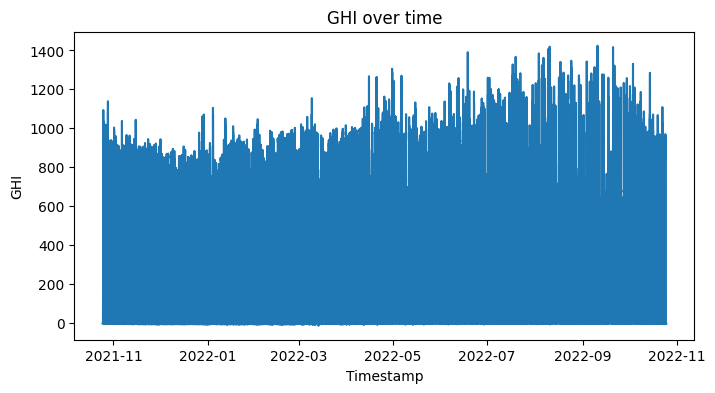

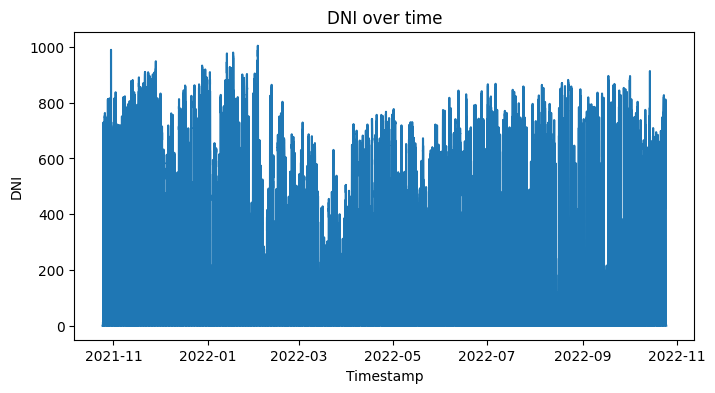

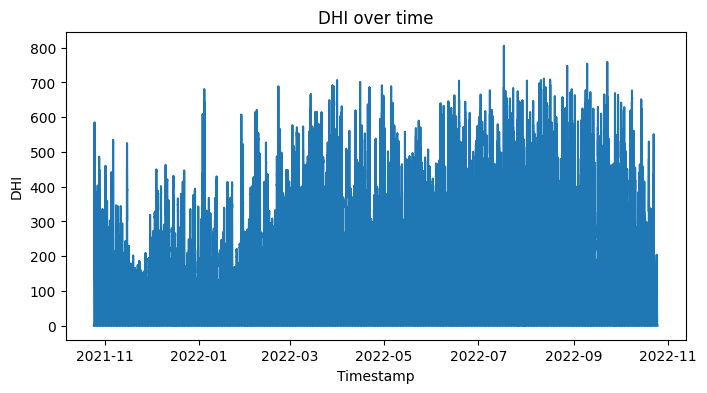

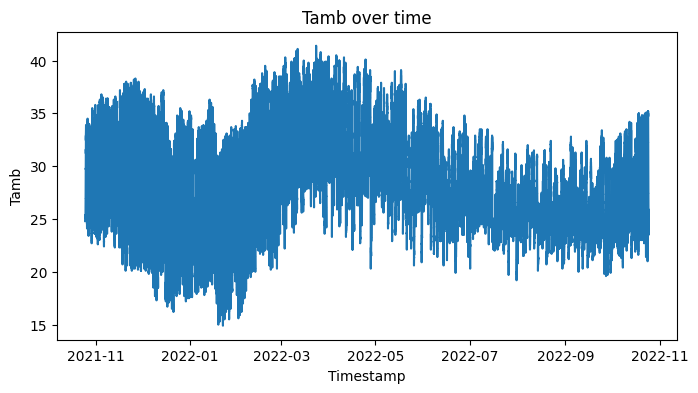

In [7]:
# 7. Simple plots
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp')

    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        if col in df.columns:
            plt.figure(figsize=(8,4))
            plt.plot(df['Timestamp'], df[col])
            plt.title(f'{col} over time')
            plt.xlabel('Timestamp')
            plt.ylabel(col)
            plt.show()

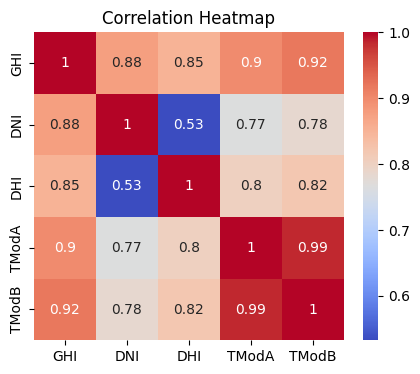

In [8]:
# 8. Correlation heatmap
import seaborn as sns
corr_cols = [c for c in ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

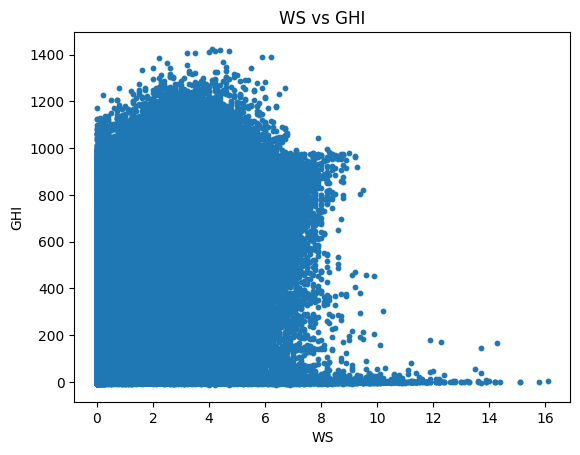

In [9]:
# 9. Scatter example (WS vs GHI)
if 'WS' in df.columns and 'GHI' in df.columns:
    plt.scatter(df['WS'], df['GHI'], s=10)
    plt.xlabel('WS')
    plt.ylabel('GHI')
    plt.title('WS vs GHI')
    plt.show()

In [10]:
# 10. Save cleaned data
output_file = f'../data/togo_clean.csv'
df.to_csv(output_file, index=False)
print('Cleaned data saved to', output_file)

Cleaned data saved to ../data/togo_clean.csv
